## **Importando os dados**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

tide = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trab DM/tide.csv', delimiter=';')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trab DM/day_forecast.csv', delimiter=';')
hf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trab DM/hour_forecast.csv', delimiter=';')
fact_shape = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trab DM/fact_shape.csv', delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
# Creating the scatter matrix:
df.head()

,iddayforecast,date,sunrise,sunset,moonset,moonrise,moon_phase,moon_illumination,maxtemp,mintemp,idbeach
0,334,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,368
1,459,2020-03-06,06:10 AM,06:40 PM,04:37 PM,02:27 AM,Waxing Gibbous,80,26,18,368
2,460,2020-03-06,06:10 AM,06:40 PM,04:37 PM,02:27 AM,Waxing Gibbous,80,26,18,369
3,461,2020-03-06,06:10 AM,06:40 PM,04:37 PM,02:27 AM,Waxing Gibbous,80,26,18,370
4,462,2020-03-06,06:10 AM,06:40 PM,04:37 PM,02:27 AM,Waxing Gibbous,80,26,18,371


In [ ]:
df['moon_phase'].value_counts()

Waxing Gibbous     161
Waxing Crescent    127
Waning Crescent    112
First Quarter      105
Waning Gibbous      98
Last Quarter        98
New Moon            70
Full Moon           49
Name: moon_phase, dtype: int64

In [ ]:
#ns.pairplot(df)

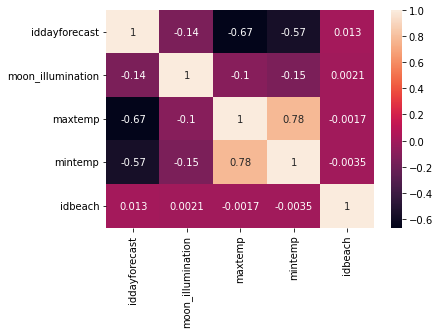

In [ ]:
sns.heatmap(df.corr(), annot=True)

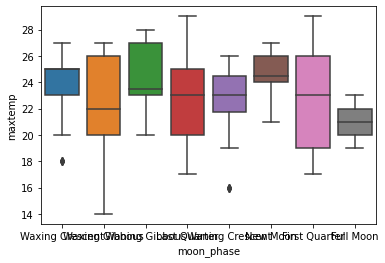

In [ ]:
sns.boxplot(x='moon_phase', y='maxtemp', data=df)

In [ ]:
hf.head(1)

,idhourforecast,iddayforecast,time,temperature,windspeed,winddirdegree,preciptation,humidity,pressure,cloundover,heatIndex,dewpoint,windchill,windgust,feelslike,sigheight,swellheight,swelldir,period,watertemp
0,494,334,0,23,26,10,0.8,89,1013,100,25,21,23,46,25,0.8,0.6,110,9.8,26


In [ ]:
#sns.pairplot(hf)

In [ ]:
#sns.heatmap(hf.corr(), annot=True)

In [ ]:
bch = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trab DM/beach.csv', delimiter=';')
bch.head(1)

,idbeach,name,city,state,country,latitude,longitude
0,368,Barra da Lagoa,Florianopolis,Santa Catarina,Brasil,-27.572289,-48.428124


## **Tratamento dos dados por dia**

In [ ]:
result = pd.merge(hf, df, on="iddayforecast")
result = pd.merge(result, bch, on="idbeach")
result = result.drop(columns=['idhourforecast','iddayforecast','idbeach','latitude','longitude','country','state','city'])
#result['time'] = pd.to_datetime(result['time'])

# Ordena pela data e salva em um novo DataFrame
result_ordenado = result.sort_values(by=['date', 'time'])

result_ordenado.head(10)

,time,temperature,windspeed,winddirdegree,preciptation,humidity,pressure,cloundover,heatIndex,dewpoint,...,date,sunrise,sunset,moonset,moonrise,moon_phase,moon_illumination,maxtemp,mintemp,name
0,0,23,26,10,0.8,89,1013,100,25,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
1,100,23,27,126,1.0,90,1013,100,25,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
2,200,23,27,242,1.3,91,1012,100,25,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
3,300,23,27,357,1.5,91,1011,100,25,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
4,400,23,26,354,1.0,90,1011,92,25,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
5,500,23,25,351,0.6,88,1011,83,25,20,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
6,600,23,24,347,0.1,87,1012,75,25,20,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
7,700,23,23,344,0.1,83,1012,74,26,20,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
8,800,24,22,342,0.1,80,1012,74,26,20,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
9,900,25,22,339,0.1,76,1013,73,27,21,...,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa


In [ ]:
sns.pairplot(result_ordenado)

Output hidden; open in https://colab.research.google.com to view.

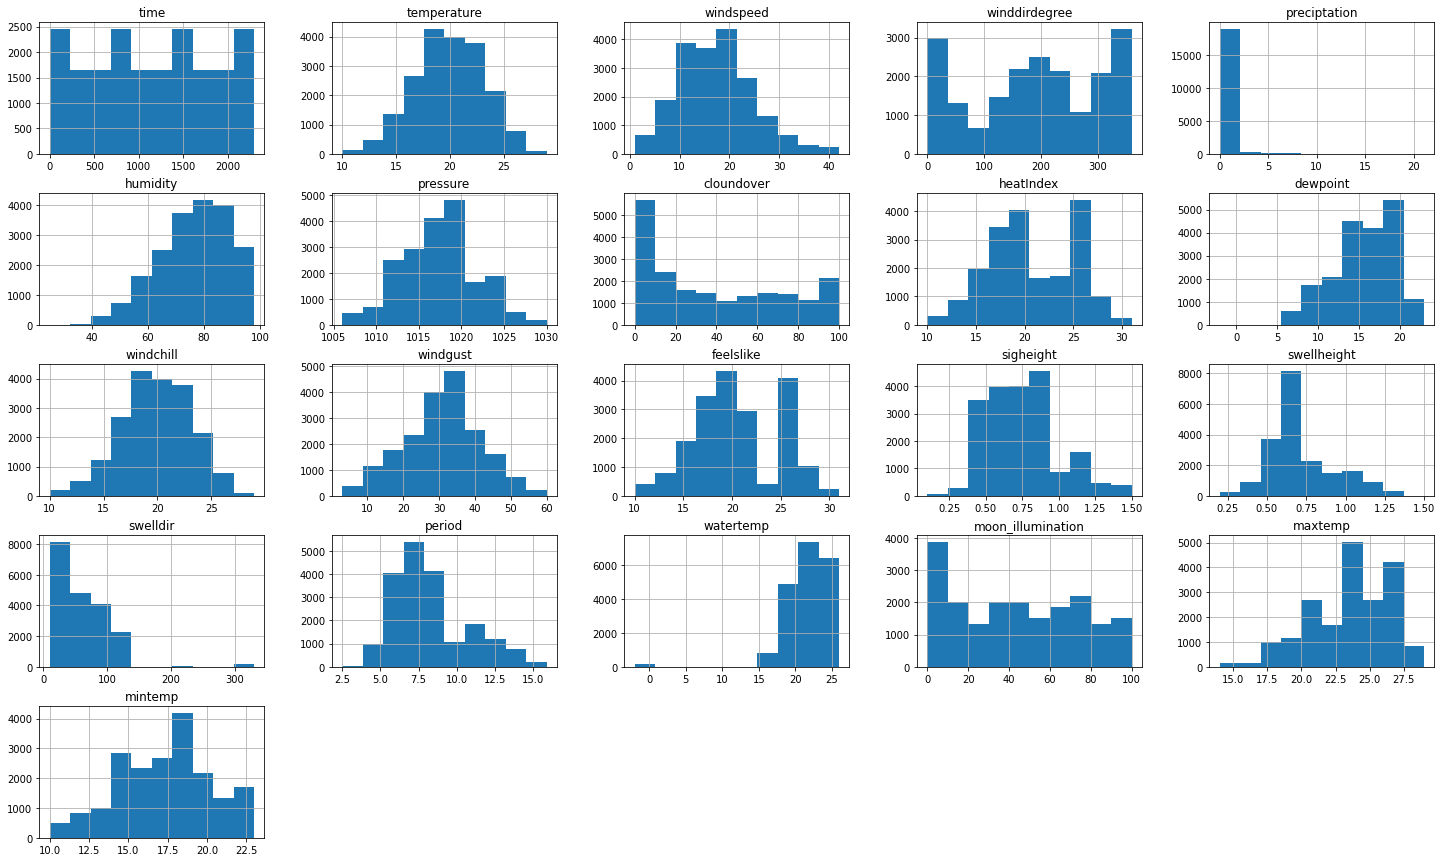

In [ ]:

result_ordenado.hist(figsize=[25,15]);

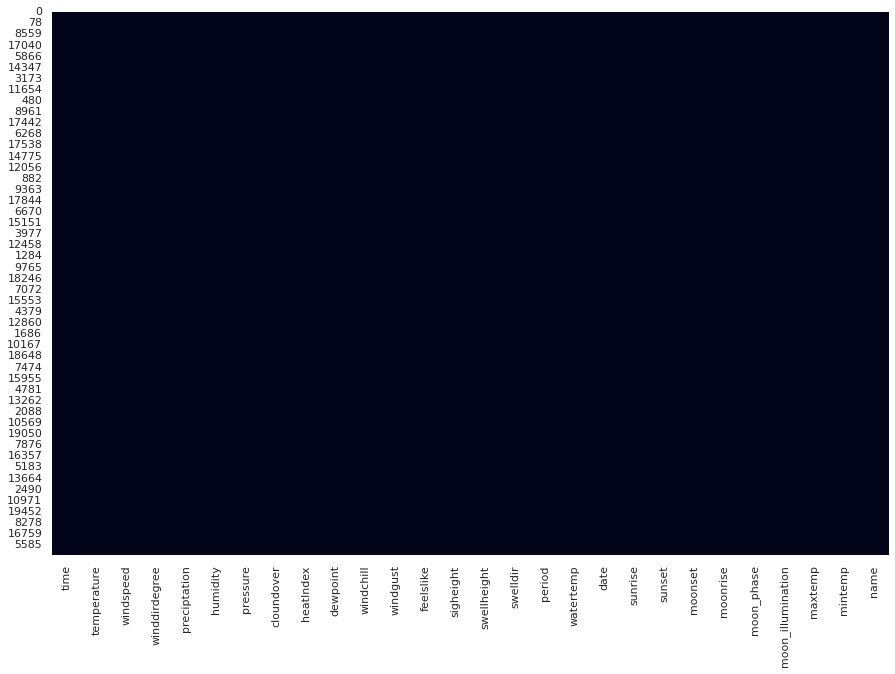

In [ ]:
sns.heatmap(result_ordenado.isnull(), cbar = False);

## **Tratamento dos dados da Maré**

In [ ]:
tide.head(1)

,idtide,iddayforecast,time,height,type
0,376,334,2020-02-25 03:31:00,0.83,HIGH


realiza o merge dos arquivos .csv em uma unica tabela.

In [ ]:
tidedf = pd.merge(tide, df, on="iddayforecast")
tidedf = pd.merge(tidedf, bch, on="idbeach")
tidedf = tidedf.drop(columns=['idtide','iddayforecast','idbeach','latitude','longitude','country','state','city'])
tidedf['time'] = pd.to_datetime(tidedf['time'])

# Ordena pela data e salva em um novo DataFrame
tidedf_ordenado = tidedf.sort_values(by='time')

tidedf_ordenado.head(5)

,time,height,type,date,sunrise,sunset,moonset,moonrise,moon_phase,moon_illumination,maxtemp,mintemp,name
0,2020-02-25 03:31:00,0.83,HIGH,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
1,2020-02-25 10:28:00,0.19,LOW,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
2,2020-02-25 15:30:00,0.91,HIGH,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
3,2020-02-25 22:48:00,0.08,LOW,2020-02-25,06:04 AM,06:50 PM,07:36 AM,08:16 PM,Waxing Crescent,8,26,23,Barra da Lagoa
2444,2020-03-06 00:32:00,0.76,HIGH,2020-03-06,06:10 AM,06:40 PM,04:37 PM,02:27 AM,Waxing Gibbous,80,26,18,Campeche


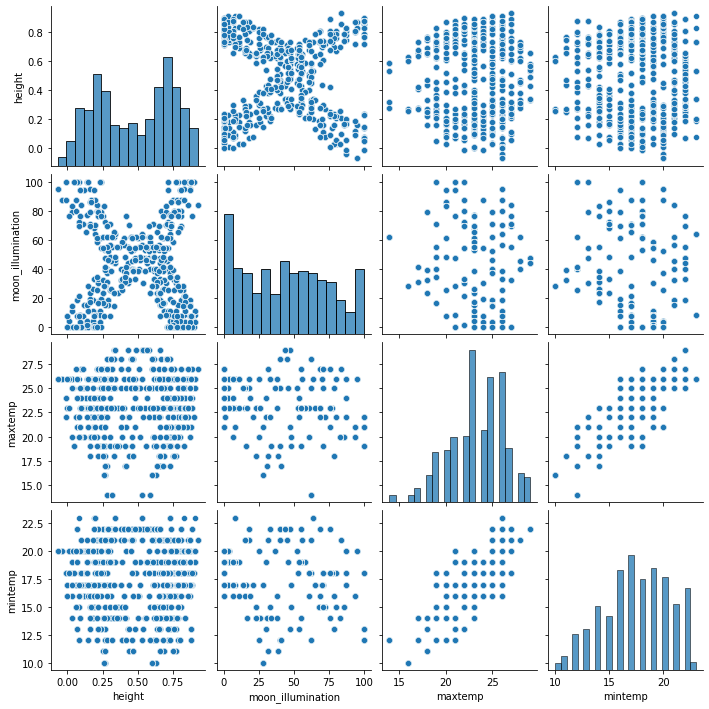

In [ ]:
sns.pairplot(tidedf_ordenado)

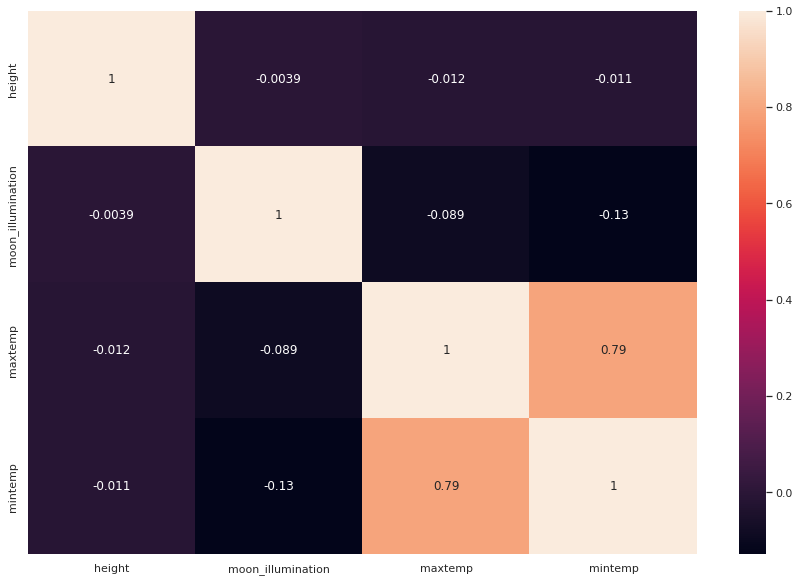

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(tidedf_ordenado.corr(), annot=True);


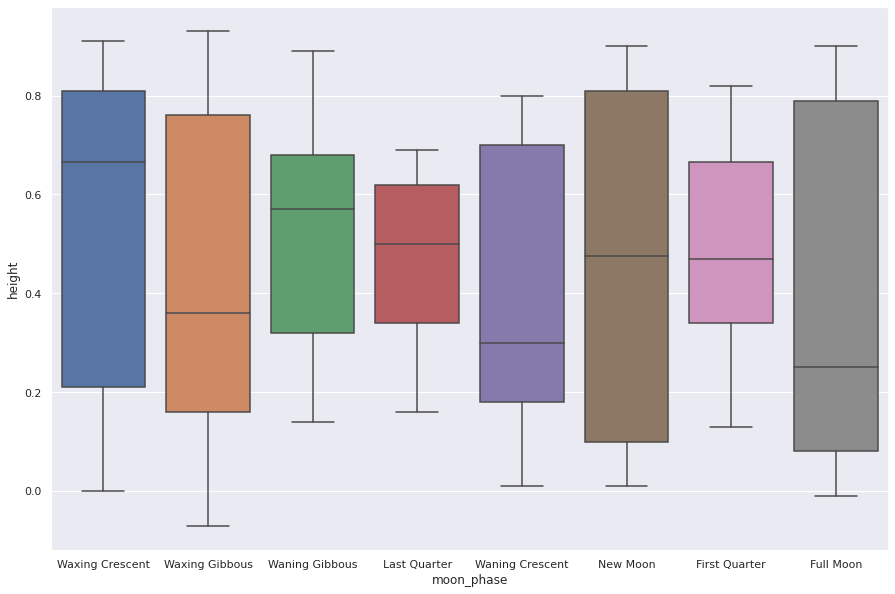

In [ ]:
sns.boxplot(x='moon_phase', y='height', data=tidedf_ordenado);

Fazer analise gerais e depois focar para cada praia, verificando se a direção do vento tem influencia na altura da onda.

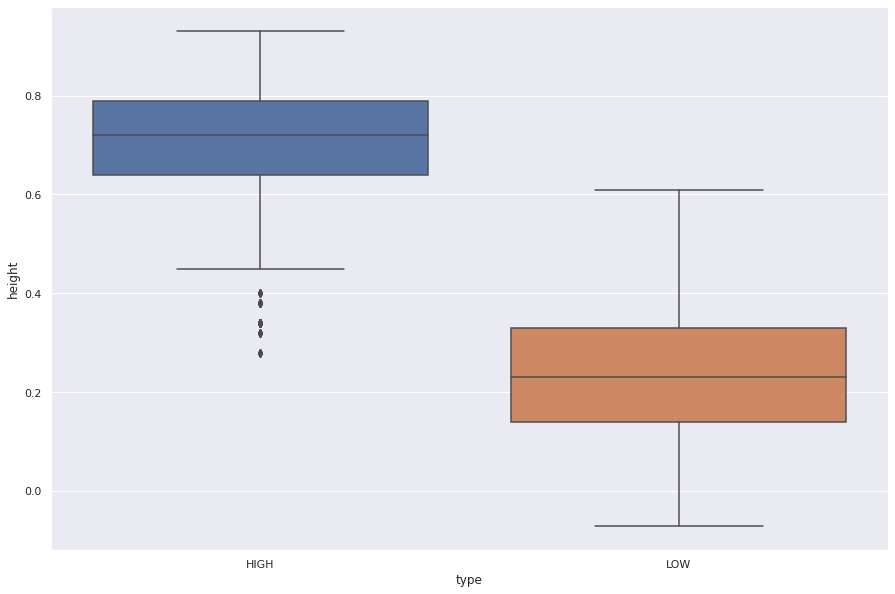

In [ ]:
sns.boxplot(x='type', y='height', data=tidedf_ordenado);

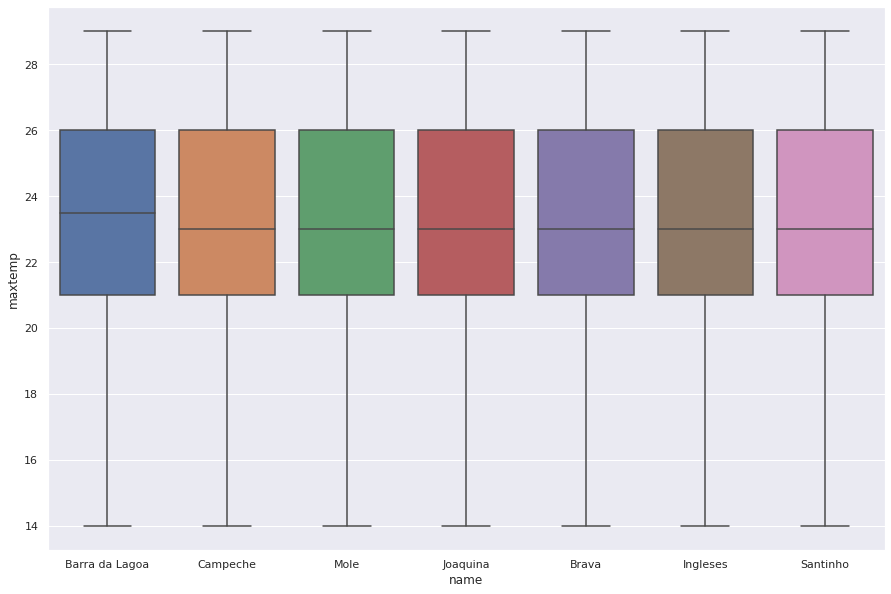

In [ ]:
sns.boxplot(x='name', y='maxtemp', data=tidedf_ordenado);

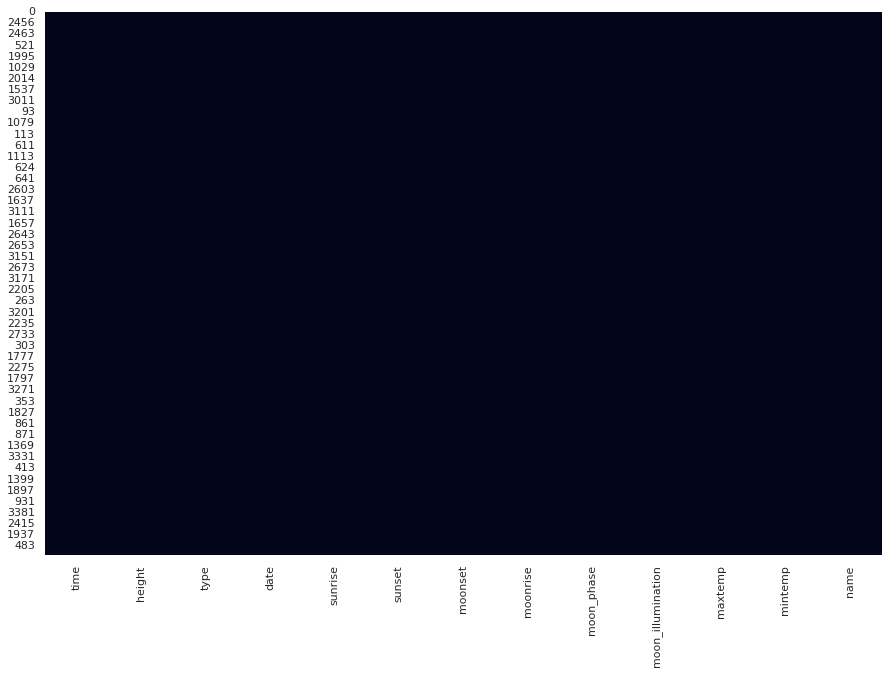

In [ ]:
sns.heatmap(tidedf_ordenado.isnull(), cbar = False);